In [90]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import forest
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas.util.testing as tm

In [91]:
#setting databases

test_df = pd.read_csv(r"C:\Users\Lenovo\Downloads\fashion-mnist_test.csv")
train_df = pd.read_csv(r"C:\Users\Lenovo\Downloads\fashion-mnist_train.csv")

In [92]:
print('Setting the labels...')
labels = {0:"T-shirt/top" , 1:"Trouser" , 2:"Pullover" , 3:"Dress" , 4:"Coat" , 5:"Sandal" , 6:"Shirt" , 7:"Sneaker" , 8:"Bag" , 9:"Ankle boot"}

Setting the labels...


In [93]:
#splitting the data

train_data = np.array(train_df , dtype = 'float32')
test_data = np.array(test_df , dtype = 'float32')
x_train = train_data[: , 1:] / 255
y_train = train_data[: , 0]
x_test = test_data[: , 1:] / 255
y_test = test_data[: , 0]

x_train (60000, 784)
y_train (60000,)
x_test (10000, 784)
y_test (10000,)


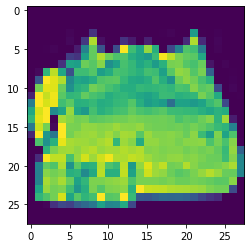

In [94]:
print('x_train' , x_train.shape)
print('y_train' , y_train.shape)
print('x_test' , x_test.shape)
print('y_test' , y_test.shape)

#example for image:
im = x_train[100 , :].reshape((28 , 28))
plt.imshow(im)
plt.show()

[[845   0  16  40   3   1  84   0  11   0]
 [  1 963   9  19   3   1   3   0   1   0]
 [  9   1 772  10 143   0  58   0   7   0]
 [ 16   6  11 924  25   0  17   0   1   0]
 [  0   1  70  38 846   0  42   0   3   0]
 [  0   0   0   0   0 919   0  54   7  20]
 [189   1 112  32 100   0 554   0  12   0]
 [  0   0   0   0   0  17   0 913   0  70]
 [  1   1  10   2   3   3  10   3 966   1]
 [  0   0   0   0   0   7   1  48   3 941]]
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      1000
         1.0       0.99      0.96      0.98      1000
         2.0       0.77      0.77      0.77      1000
         3.0       0.87      0.92      0.89      1000
         4.0       0.75      0.85      0.80      1000
         5.0       0.97      0.92      0.94      1000
         6.0       0.72      0.55      0.63      1000
         7.0       0.90      0.91      0.90      1000
         8.0       0.96      0.97      0.96      1000
         9.0       0.91     

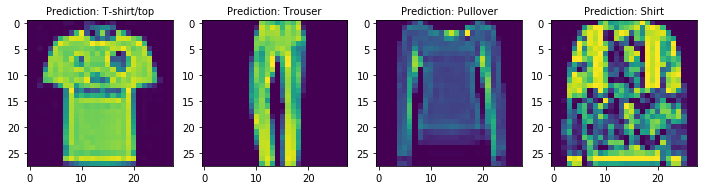

In [96]:
#random forest

model = RandomForestClassifier(n_estimators = 25 , max_depth = 12 , random_state = 2)
model.fit(x_train , y_train)
pred = model.predict(x_test)
print(confusion_matrix(y_test , pred))
print(classification_report(y_test , pred))
incorrect = []
for i in range(len(y_test)):
    if(not pred[i] == y_test[i]):
        incorrect.append(i)
    if(len(incorrect) == 4):
        break
plt.figure(figsize = (12 , 4))
for i in range(0 , 4):
    plt.subplot(1 , 4 , i + 1)
    num = i
    i = x_test[i , :].reshape((28 , 28))
    num = pred[num]
    plt.imshow(i)
    plt.title('Prediction: ' + str(labels[num]) , fontsize = 10)

#with PCA
pca_50 = PCA(n_components = 50)
pca_50_new = PCA(n_components = 50)
pca_result_50_new = pca_50.fit_transform(x_train)
x_train_pca , x_test_pca , y_train_pca , y_test_pca = train_test_split(pca_result_50_new , y_train , test_size = 0.25)
pca_model = RandomForestClassifier(n_estimators = 25 , max_depth = 12 , random_state = 2)
pca_model.fit(x_train_pca , y_train_pca)
pca_pred = pca_model.predict(x_test_pca)
print(confusion_matrix(y_test_pca , pca_pred))
print(classification_report(y_test_pca , pca_pred))

In [97]:
#PCA

def get_principal_components(n_components):
    pca = PCA(n_components = n_components)
    pca.fit(x_train)
    x_pc = pca.transform(x_train)
    n_pcs = pca.components_.shape[0]
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
    initial_featnames = range(28 * 28)
    most_important_names = [initial_featnames[most_important[i]] for i in range(n_pcs)]
    dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
    df = pd.DataFrame(dic.items())
    return df,pca
df , pca = get_principal_components(n_components = 50)
df

,0,1
0,PC0,150
1,PC1,442
2,PC2,398
3,PC3,680
4,PC4,742
5,PC5,228
6,PC6,396
7,PC7,104
8,PC8,46
9,PC9,651


In [1]:
#adaboost

ada1 = AdaBoostClassifier(n_estimators = 50 , learning_rate = 1)
model = ada1.fit(x_train , x_test)
y_pred_ada = model.predict(x_test_pca)
print("Accuracy:" , accuracy_score(y_test_pca , y_pred_ada))

NameError: name 'AdaBoostClassifier' is not defined